In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

from importlib.machinery import SourceFileLoader
u=SourceFileLoader('u','/home/marco/work/tesi/BEGepro/scripts/utils.py').load_module()

import numpy as np
import pylab as plt
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca
import peakutils as pu
from scipy.signal import savgol_filter
from scipy.optimize import fsolve

In [2]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()

coll1=coll.subset('ae',0,1.6e-2)
curr1=coll1.get_curr()
trace1=coll1.get_traces()
coll2=coll.subset('ae',1.6e-2)
curr2=coll2.get_curr()
trace2=coll2.get_traces()

<IPython.core.display.Javascript object>


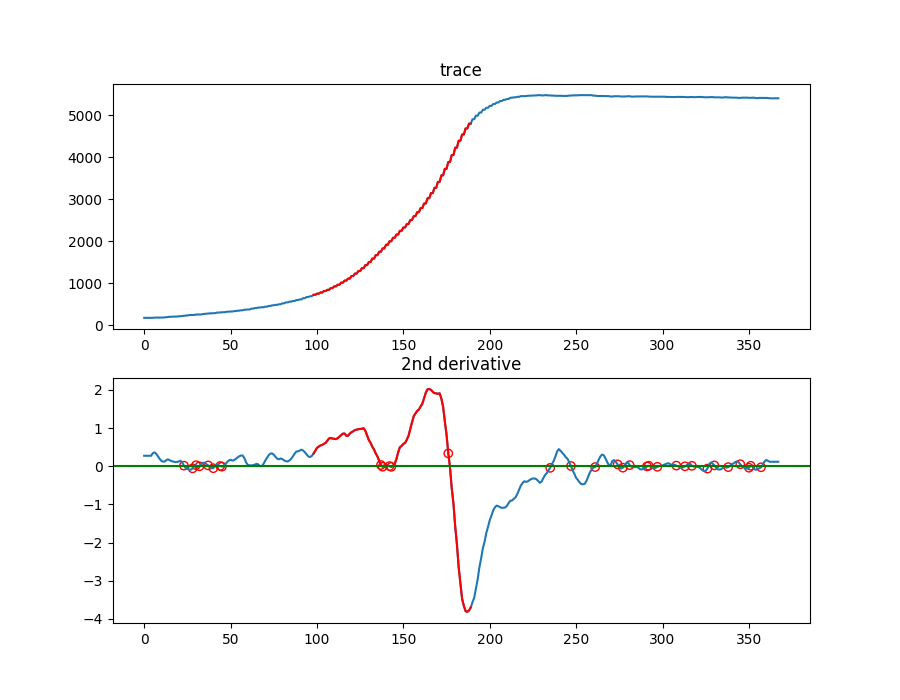

In [106]:
i=10
f=savgol_filter(trace1[i],10,0)
f=savgol_filter(f,10,2,deriv=2)
fig,axs=plt.subplots(2,figsize=(9,7))
axs[0].plot(trace1[i])
axs[0].set_title('trace')
axs[1].plot(f)
axs[1].set_title('2nd derivative')
plt.show()

In [107]:
rtobj=u.rise_time()
rtobj.compute_rt(trace1[i],4e-9)

x=np.arange(0,len(trace1[i]),1)
axs[0].plot(x[rtobj.i_min : rtobj.i_max],trace1[i][rtobj.i_min : rtobj.i_max],color='r')
axs[1].plot(x[rtobj.i_min : rtobj.i_max],f[rtobj.i_min : rtobj.i_max],color='r')
plt.show()

In [108]:
from PyAstronomy import pyaC

xvals= pyaC.zerocross1d(x, f, getIndices=True)
xvals=xvals[1]
print(xvals)
plt.scatter(xvals,f[xvals],marker='o',color='r',facecolors='none')

plt.axhline(0, color='g')

[ 23  28  30  32  37  40  44  45 137 138 142 143 176 235 247 261 274 277
 281 291 292 297 308 313 317 326 330 338 345 350 351 357]
